In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pyspark
#import datawig
from scipy.stats import skew

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder.appName('Practice').getOrCreate()

24/08/06 16:25:20 WARN Utils: Your hostname, sunbeam-ThinkPad-Yoga-260 resolves to a loopback address: 127.0.1.1; using 192.168.0.106 instead (on interface wlp4s0)
24/08/06 16:25:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/06 16:25:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
df=spark.read.csv('zomato.csv',header=True,inferSchema=True)
df.select(df.columns[0:6]).show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|                 url|             address|                name|        online_order|          book_table| rate|
+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|https://www.zomat...|942, 21st Main Ro...|               Jalsa|                 Yes|                 Yes|4.1/5|
|     +91 9743772233"|        Banashankari|       Casual Dining|Pasta, Lunch Buff...|North Indian, Mug...|  800|
|https://www.zomat...|2nd Floor, 80 Fee...|      Spice Elephant|                 Yes|                  No|4.1/5|
|https://www.zomat...|1112, Next to KIM...|     San Churro Cafe|                 Yes|                  No|3.8/5|
|https://www.zomat...|1st Floor, Annaku...|Addhuri Udupi Bho...|                  No|                  No|3.7/5|
|https://www.zomat...|10, 3rd Floor, La...|       Grand Village|                  No|           

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.printSchema()

root
 |-- url: string (nullable = true)
 |-- address: string (nullable = true)
 |-- name: string (nullable = true)
 |-- online_order: string (nullable = true)
 |-- book_table: string (nullable = true)
 |-- rate: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- location: string (nullable = true)
 |-- rest_type: string (nullable = true)
 |-- dish_liked: string (nullable = true)
 |-- cuisines: string (nullable = true)
 |-- approx_cost(for two people): string (nullable = true)
 |-- reviews_list: string (nullable = true)
 |-- menu_item: string (nullable = true)
 |-- listed_in(type): string (nullable = true)
 |-- listed_in(city): string (nullable = true)



In [8]:
df.columns

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [9]:
df.describe().show()

24/08/06 16:25:47 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+--------------------+--------------------+--------------------+------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                 url|             address|                name|online_order|book_table|              rate|               votes|               phone|            location|           rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|
+-------+--------------------+--------------------+--------------------+------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--

In [10]:
df.filter(df.show().isNotNull())

+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+--------------------+--------------------+--------------------+
|                 url|             address|                name|        online_order|          book_table| rate|               votes|               phone|            location|           rest_type|          dish_liked|            cuisines|approx_cost(for two people)|        reviews_list|           menu_item|     listed_in(type)|     listed_in(city)|
+--------------------+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+--------------------+-----------

AttributeError: 'NoneType' object has no attribute 'isNotNull'

In [2]:
df=pd.read_csv('zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df['online_order'] = df['online_order'].map(dict(Yes=1, No=0))

In [4]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,0,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,0,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  int64 
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
df.dtypes

url                            object
address                        object
name                           object
online_order                    int64
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
del df['url']
del df['address']
del df['phone']

In [9]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

/tmp/ipykernel_9662/1952270314.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.online_order[df.online_order == 'Yes'] = 1
/tmp/ipykernel_9662/1952270314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [13]:
# df1 = df['reviews_list']
# df1.to_csv()

In [ ]:
import re
from textblob import TextBlob
from collections import Counter
import pandas as pd

# Load the DataFrame
file_path = 'reviews.csv'
df_rv = pd.read_csv(file_path)

# Function to clean the review text
def clean_review(text):
    # Remove patterns like 'Rated 4.0' and 'RATED\n'
    cleaned_text = re.sub(r'Rated \d\.\d|RATED\n\s*', '', text)
    return cleaned_text.strip()

# Function to categorize sentiment
def get_sentiment(text):
    # Analyze the sentiment polarity using TextBlob
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    # Categorize sentiment based on polarity
    if polarity > 0.5:
        return 'Better'
    elif polarity > 0:
        return 'Good'
    elif polarity == 0:
        return 'Average'
    else:
        return 'Bad'

# Process each row
def process_row(row):
    try:
        # Assuming the input is a list of tuples
        if isinstance(row, str):
            reviews = eval(row)
            cleaned_reviews = [clean_review(review[1]) for review in reviews if len(review) > 1]
            sentiments = [get_sentiment(review) for review in cleaned_reviews]
            
            # Find the most frequent sentiment
            most_frequent_sentiment = Counter(sentiments).most_common(1)[0][0]
            
            return most_frequent_sentiment
        else:
            return 'Unknown'  # If row is not a string, return a default value
    except (IndexError, SyntaxError, TypeError) as e:
        return 'Unknown'  # Return 'Unknown' if there's an error processing the row

# Apply the function to each row in the DataFrame and create the sentiment column
df_rv['sentiment'] = df_rv['reviews_list'].apply(process_row)

# Save the updated DataFrame with sentiments back to a CSV file (if needed)
#df.to_csv('reviews_with_sentiments.csv', index=False)

# Display the first few rows to verify
df_rv.head(100)


In [40]:
df['review_sentimen'] = df_rv['sentiment']
df.head(50)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),review_sentimen
0,Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Good
1,Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Good
2,San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Good
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Good
4,Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Good
5,Timepass Dinner,1,0,3.8/5,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,Good
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,Good
7,Onesta,1,1,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari,Good
8,Penthouse Cafe,1,0,4.0/5,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari,Good
9,Smacznego,1,0,4.2/5,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari,Good


In [42]:
df.to_csv("df_with sentiments")

In [88]:
df=pd.read_csv("df_with sentiments.csv")

In [89]:
df4 = df['rate']
df['rate'] = df4.dropna().apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
df

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),review_sentimen
0,0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Good
1,1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Good
2,2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Good
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Good
4,4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,Good
51713,51713,Vinod Bar And Restaurant,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield,Unknown
51714,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield,Unknown
51715,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,Good


In [90]:
df.describe()

,Unnamed: 0,online_order,book_table,rate,votes
count,51717.000000,51717.000000,51717.000000,41665.000000,51717.000000
mean,25858.000000,0.588665,0.124698,3.700449,283.697527
std,14929.556273,0.492080,0.330379,0.440513,803.838853
min,0.000000,0.000000,0.000000,1.800000,0.000000
25%,12929.000000,0.000000,0.000000,3.400000,7.000000
50%,25858.000000,1.000000,0.000000,3.700000,41.000000
75%,38787.000000,1.000000,0.000000,4.000000,198.000000
max,51716.000000,1.000000,1.000000,4.900000,16832.000000


In [91]:
def comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['costfor2'] = df['approx_cost(for two people)'].apply(comma)
del df['approx_cost(for two people)']

In [92]:
df.isnull().sum()

Unnamed: 0             0
name                   0
online_order           0
book_table             0
rate               10052
votes                  0
location              21
rest_type            227
dish_liked         28078
cuisines              45
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
review_sentimen        0
costfor2             346
dtype: int64

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'Jalsa'

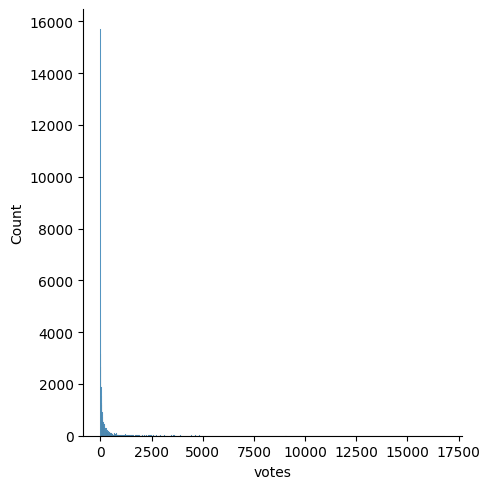

In [15]:
sns.displot(df['votes'].dropna())

Text(0, 0.5, 'Density')

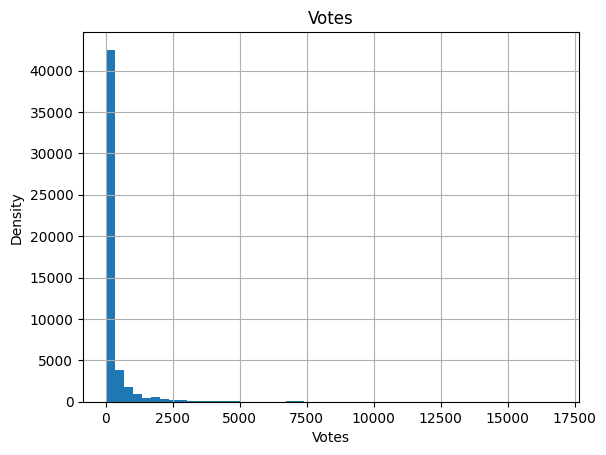

In [24]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

Text(0, 0.5, 'Density')

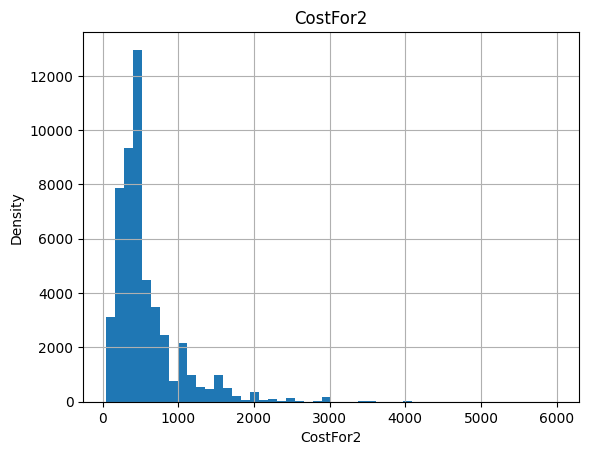

In [25]:
fig=df.costfor2.hist(bins=50)
fig.set_title('CostFor2')
fig.set_xlabel('CostFor2')
fig.set_ylabel('Density')

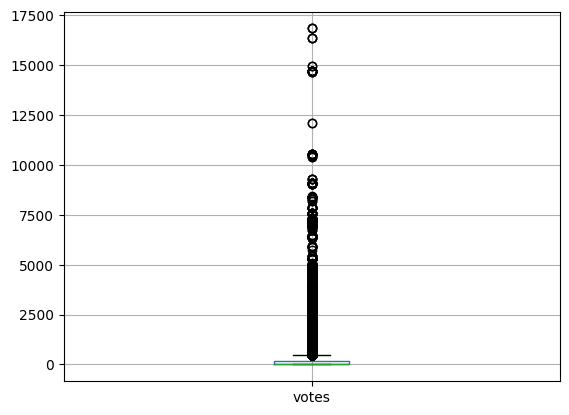

In [26]:
fig=df.boxplot(column='votes')

In [27]:
df.agg(['skew', 'kurtosis']).transpose()

TypeError: could not convert string to float: 'Jalsa'

In [28]:
df['votes']=np.sqrt(df['votes'])

In [29]:
df['costfor2']=np.sqrt(df['costfor2'])

In [30]:
df.agg(['skew', 'kurtosis']).transpose()

TypeError: could not convert string to float: 'Jalsa'

Text(0, 0.5, 'Density')

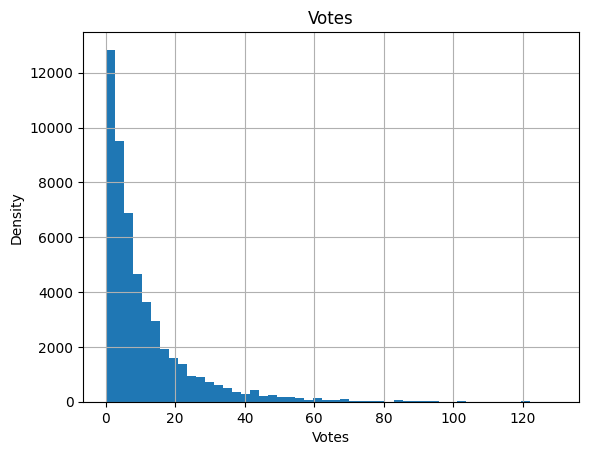

In [31]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

In [32]:
#IQR=df.votes.quantile(0.75)-df.votes.quantile(0.25)

In [33]:
'''''
lower=df['votes'].quantile(0.25)-(IQR*1.5)
upper=df['votes'].quantile(0.75)+(IQR*1.5)
print(lower),print(upper)

SyntaxError: incomplete input (3900279489.py, line 1)

In [34]:
''''
lower=df['votes'].quantile(0.25)-(IQR*3)
upper=df['votes'].quantile(0.75)+(IQR*3)
print(lower),print(upper)

SyntaxError: incomplete input (1375751037.py, line 1)

In [35]:
#df=df.copy()

In [36]:
#df.loc[df['votes']>=48,'votes']=48

Text(0, 0.5, 'Density')

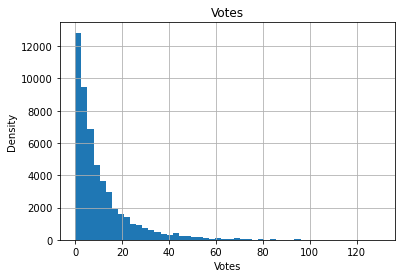

In [36]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

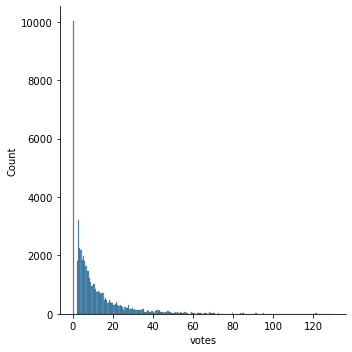

In [37]:
sns.displot(df['votes'].dropna())

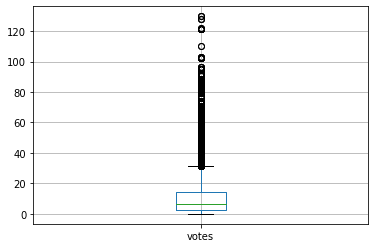

In [38]:
fig=df.boxplot(column='votes')

In [93]:
df = df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'type','listed_in(city)':'city'})

In [94]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [95]:
df.duplicated().sum()

0

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

/tmp/ipykernel_9662/3189771688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mean(),inplace=True)


In [98]:
df.isnull().sum()

Unnamed: 0             0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
location              21
rest_type            227
dish_liked         28078
cuisines              45
reviews_list           0
menu_item              0
type                   0
city                   0
review_sentimen        0
costfor2             346
dtype: int64

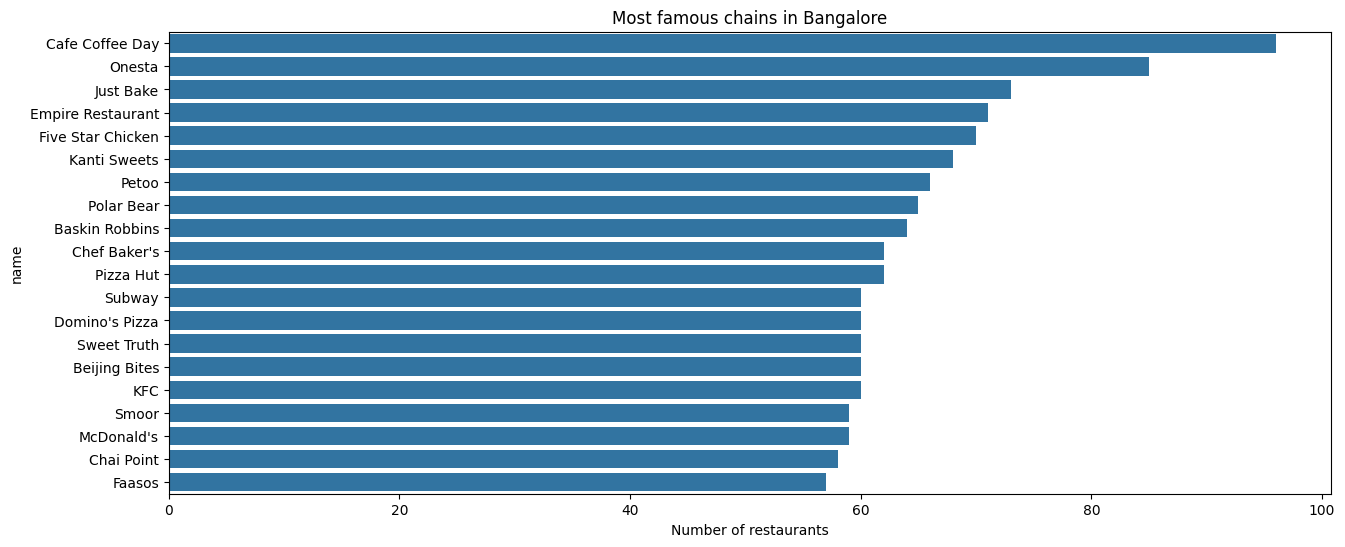

In [54]:
plt.figure(figsize=(15, 6))
df1 = df['name'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

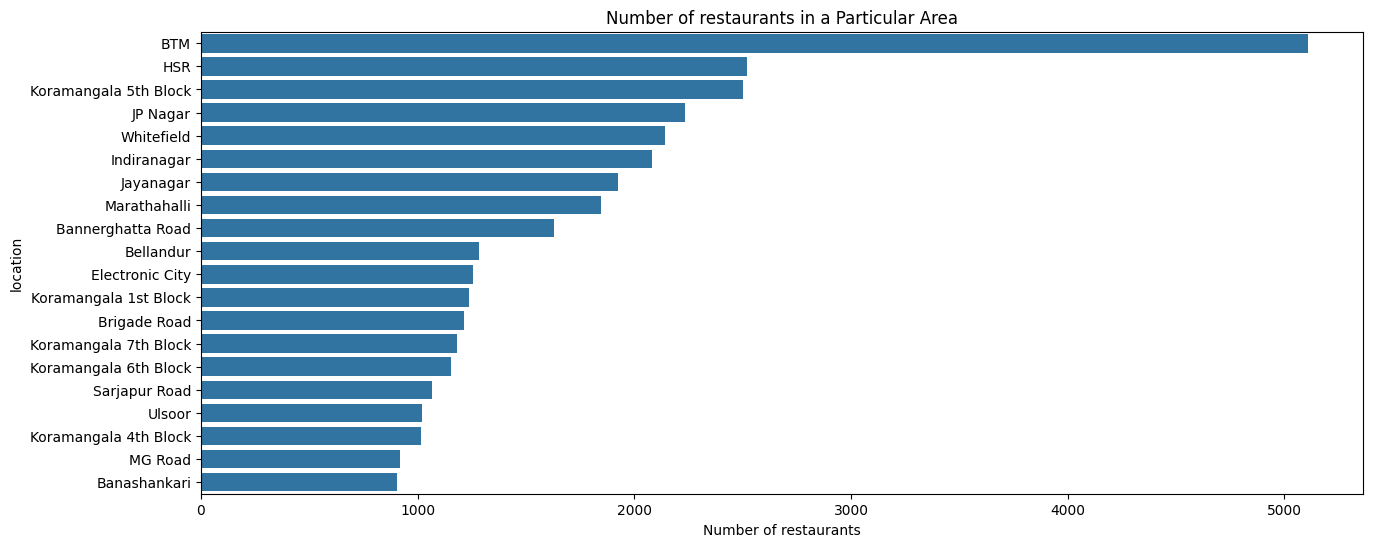

In [55]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Number of restaurants in a Particular Area')
plt.xlabel('Number of restaurants')
plt.show()

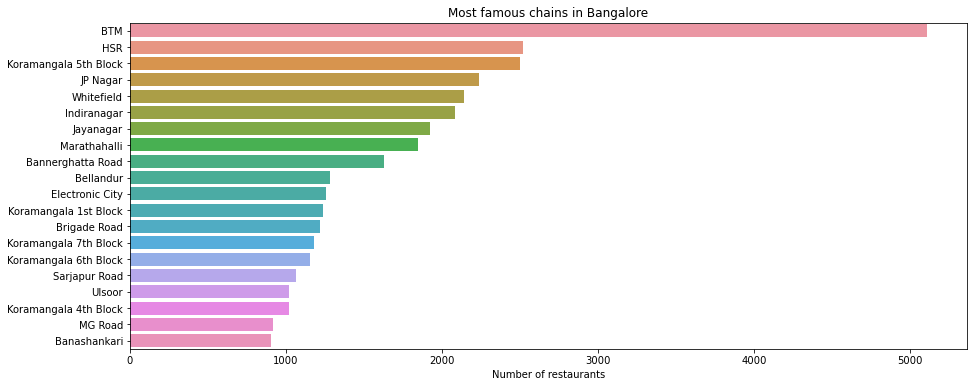

In [47]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

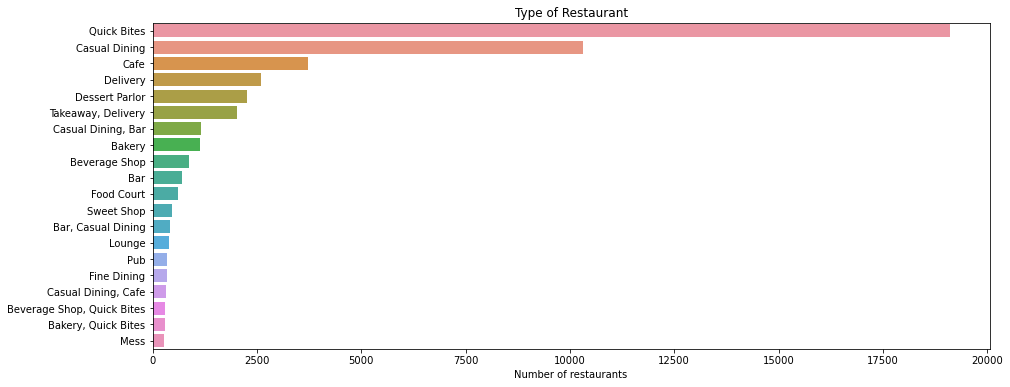

In [48]:
plt.figure(figsize=(15, 6))
df1 = df['rest_type'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Type of Restaurant')
plt.xlabel('Number of restaurants')
plt.show()

Text(0.5, 1.0, 'Restaurants taking online orders')

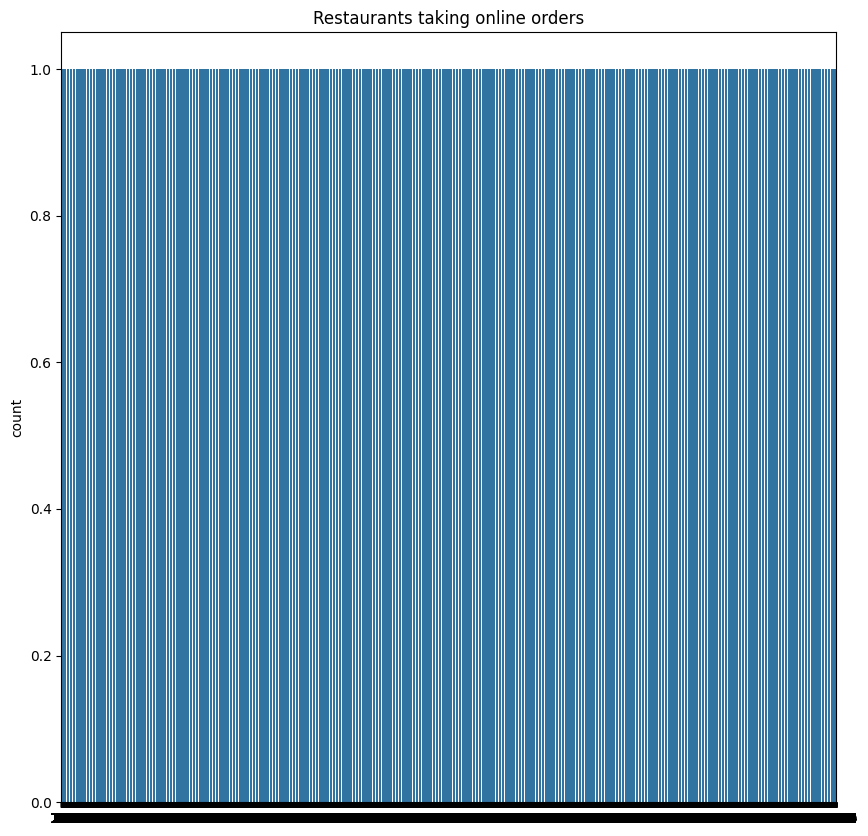

In [56]:
plt.figure(figsize=(10,10))
sns.countplot(df['online_order'])
plt.title('Restaurants taking online orders')

In [99]:
df['online_order'].value_counts()

online_order
1    30444
0    21273
Name: count, dtype: int64

In [100]:
df['book_table'].value_counts()

book_table
0    45268
1     6449
Name: count, dtype: int64

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Table Booking')

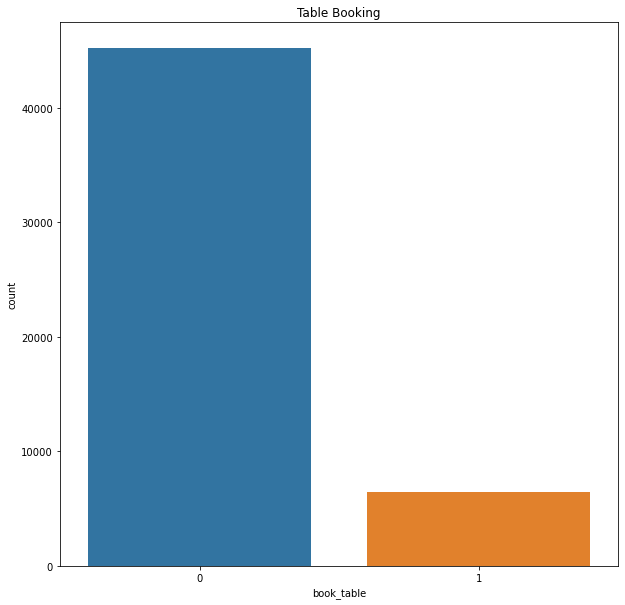

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(df['book_table'])
plt.title('Table Booking')

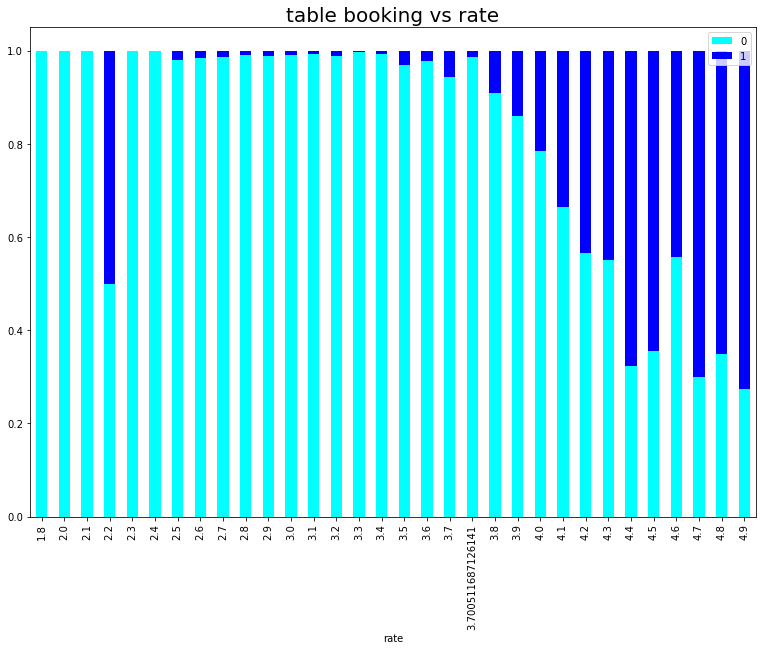

In [53]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['cyan','blue'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

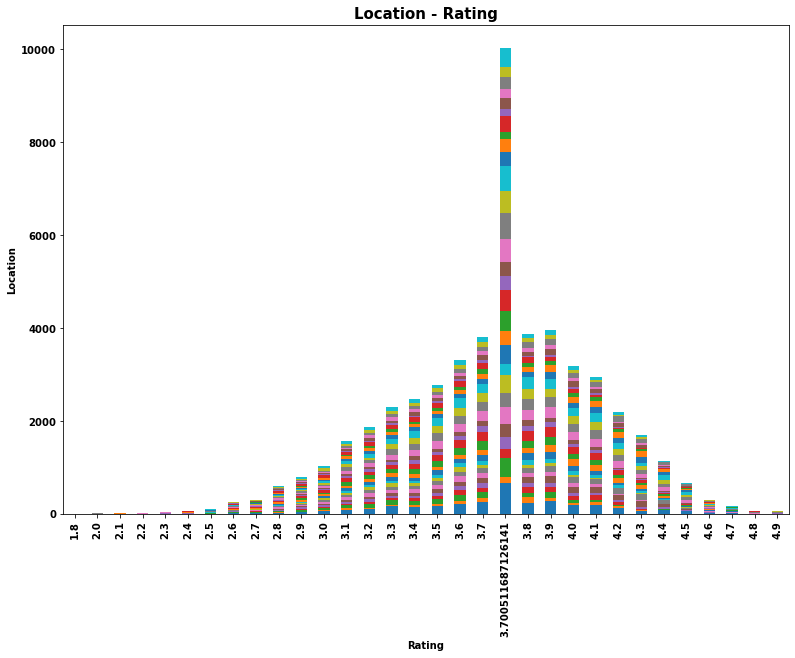

In [54]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Arnav Saini\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

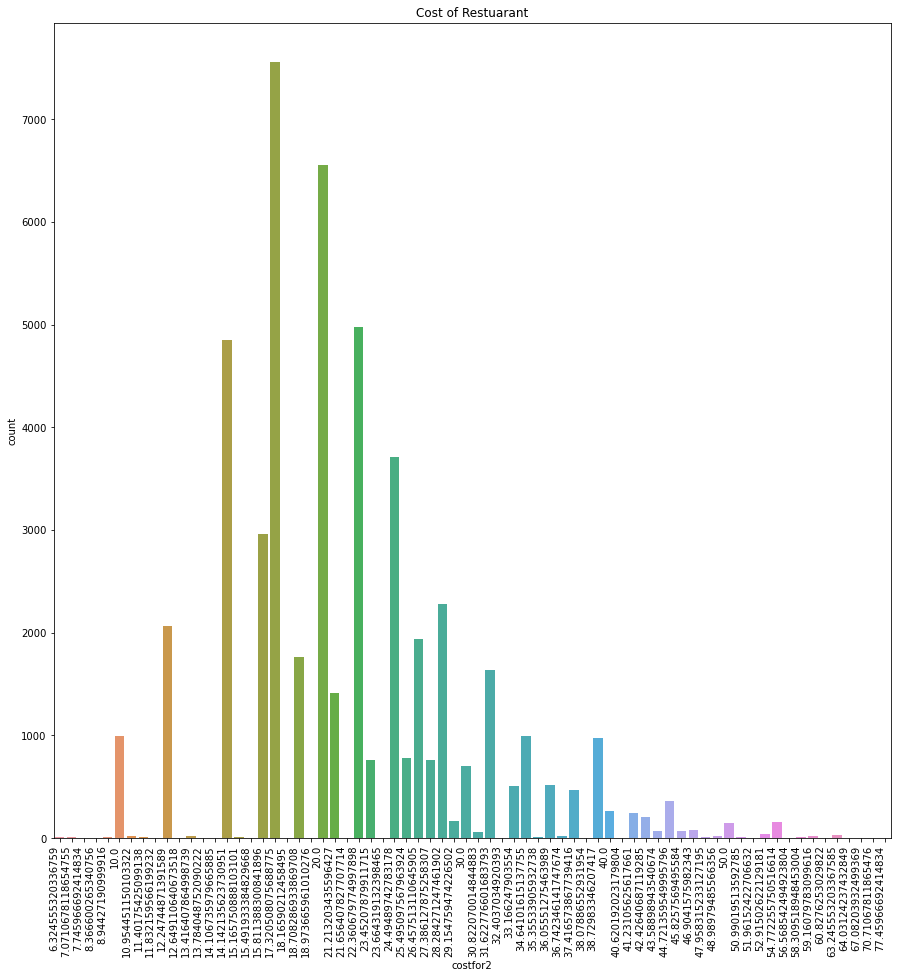

In [55]:
#Cost of Restuarant
sns.countplot(df['costfor2'])
sns.countplot(df['costfor2']).set_xticklabels(sns.countplot(df['costfor2']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

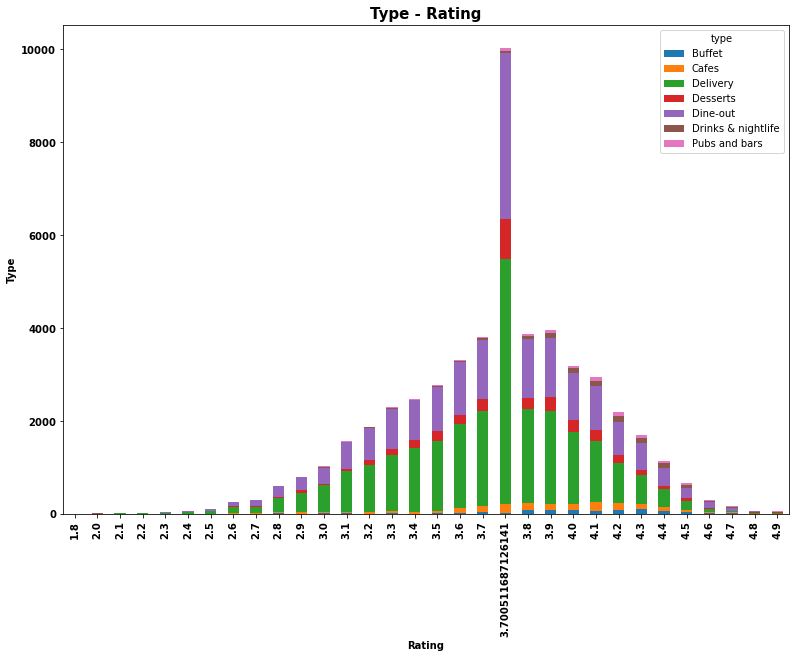

In [56]:
#Type and Rating
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

<Figure size 504x360 with 0 Axes>

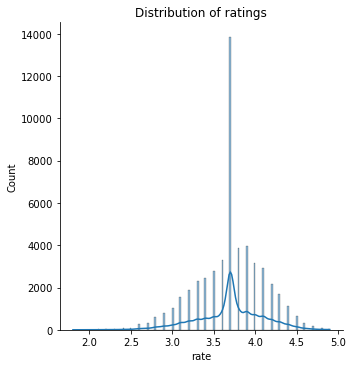

In [57]:
plt.figure(figsize=(7, 5))
sns.displot(df['rate'], kde=True)
plt.title('Distribution of ratings')
plt.show()

In [101]:
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700449
51714    3.700449
51715    4.300000
51716    3.400000
Name: rate, Length: 51717, dtype: float64

<AxesSubplot:>

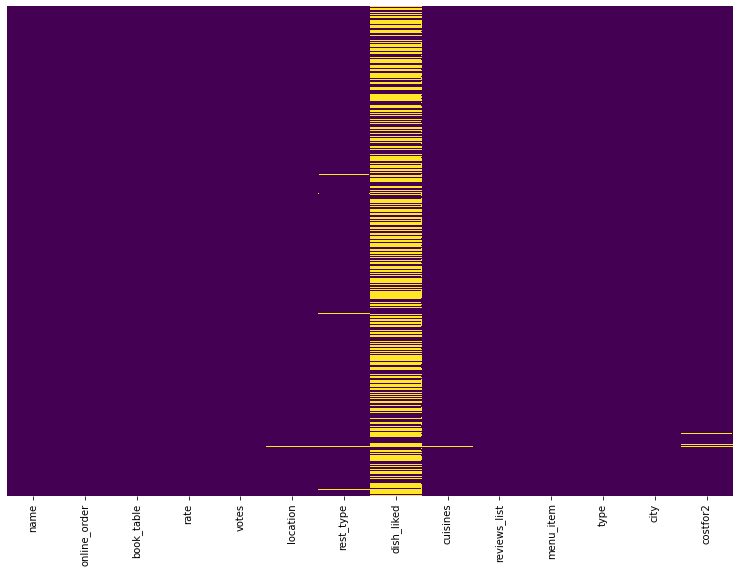

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

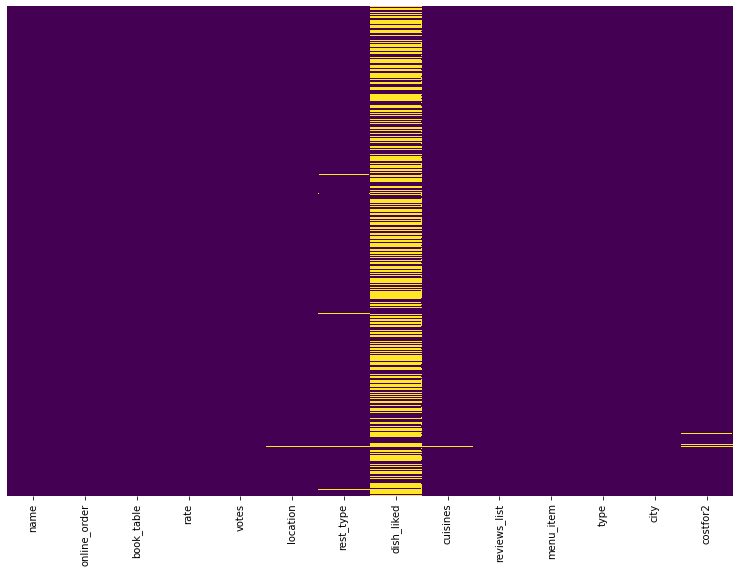

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [102]:
df['rate'].isnull().sum()

0

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       51717 non-null  int64  
 1   name             51717 non-null  object 
 2   online_order     51717 non-null  int64  
 3   book_table       51717 non-null  int64  
 4   rate             51717 non-null  float64
 5   votes            51717 non-null  int64  
 6   location         51696 non-null  object 
 7   rest_type        51490 non-null  object 
 8   dish_liked       23639 non-null  object 
 9   cuisines         51672 non-null  object 
 10  reviews_list     51717 non-null  object 
 11  menu_item        51717 non-null  object 
 12  type             51717 non-null  object 
 13  city             51717 non-null  object 
 14  review_sentimen  51717 non-null  object 
 15  costfor2         51371 non-null  float64
dtypes: float64(2), int64(4), object(10)
memory usage: 6.3+ MB


In [104]:
df1 =df.drop(['menu_item','dish_liked'],axis=1)

In [105]:
df1.isnull().sum()

Unnamed: 0           0
name                 0
online_order         0
book_table           0
rate                 0
votes                0
location            21
rest_type          227
cuisines            45
reviews_list         0
type                 0
city                 0
review_sentimen      0
costfor2           346
dtype: int64

In [106]:
df1.dropna(inplace=True)

In [107]:
df1.isnull().sum()

Unnamed: 0         0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
reviews_list       0
type               0
city               0
review_sentimen    0
costfor2           0
dtype: int64

In [108]:
df1.shape

(51148, 14)

/tmp/ipykernel_18609/378768269.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['costfor2'])


<Axes: xlabel='costfor2', ylabel='Density'>

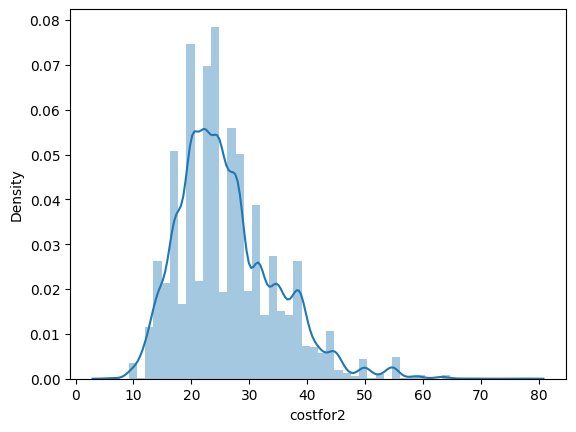

In [50]:
sns.distplot(df1['costfor2'])

/tmp/ipykernel_18609/4236440400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'])


<Axes: xlabel='votes', ylabel='Density'>

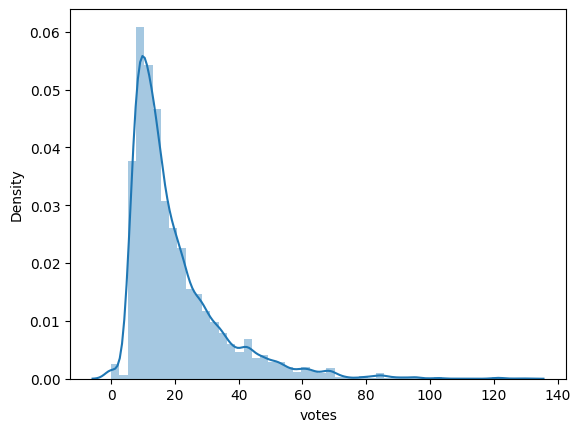

In [51]:
sns.distplot(df1['votes'])

/tmp/ipykernel_18609/464752516.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'])


<Axes: xlabel='rate', ylabel='Density'>

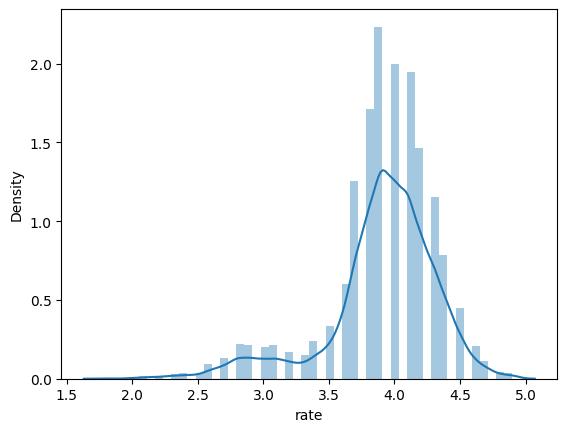

In [52]:
sns.distplot(df1['rate'])

In [109]:
df1['rest_type'].value_counts()

rest_type
Quick Bites                   19046
Casual Dining                 10273
Cafe                           3687
Delivery                       2578
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [110]:
df1

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,review_sentimen,costfor2
0,0,Jalsa,1,1,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,Good,800.0
1,1,Spice Elephant,1,0,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Good,800.0
2,2,San Churro Cafe,1,0,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Good,800.0
3,3,Addhuri Udupi Bhojana,0,0,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,Good,300.0
4,4,Grand Village,0,0,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,Good,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27,Whitefield,Bar,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,Good,1500.0
51713,51713,Vinod Bar And Restaurant,0,0,3.700449,0,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,Unknown,600.0
51714,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,Unknown,2000.0
51715,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,Good,2500.0


In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [112]:
df1['review_sentimen'].unique()

array(['Good', 'Better', 'Bad', 'Unknown', 'Average'], dtype=object)

In [113]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
order_sequence = [['Unknown','Bad','Average','Good','Better']]
encoder = OrdinalEncoder(categories=order_sequence)
df1['review_sentimen'] = encoder.fit_transform(df1[['review_sentimen']])



In [114]:
df1

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,review_sentimen,costfor2
0,0,Jalsa,1,1,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3.0,800.0
1,1,Spice Elephant,1,0,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3.0,800.0
2,2,San Churro Cafe,1,0,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.0,800.0
3,3,Addhuri Udupi Bhojana,0,0,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.0,300.0
4,4,Grand Village,0,0,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27,Whitefield,Bar,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.0,1500.0
51713,51713,Vinod Bar And Restaurant,0,0,3.700449,0,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,0.0,600.0
51714,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,0.0,2000.0
51715,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,3.0,2500.0


In [115]:
df1['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [116]:
df1['rest_type'] = df1['rest_type'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df1['cuisines'] = df1['cuisines'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
df1

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,review_sentimen,costfor2
0,0,Jalsa,1,1,4.100000,775,Banashankari,1,3,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,3.0,800.0
1,1,Spice Elephant,1,0,4.100000,787,Banashankari,1,3,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,3.0,800.0
2,2,San Churro Cafe,1,0,3.800000,918,Banashankari,2,3,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,3.0,800.0
3,3,Addhuri Udupi Bhojana,0,0,3.700000,88,Banashankari,1,2,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,3.0,300.0
4,4,Grand Village,0,0,3.800000,166,Basavanagudi,1,2,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,3.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,27,Whitefield,1,1,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,3.0,1500.0
51713,51713,Vinod Bar And Restaurant,0,0,3.700449,0,Whitefield,1,1,[],Pubs and bars,Whitefield,0.0,600.0
51714,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700449,0,Whitefield,1,1,[],Pubs and bars,Whitefield,0.0,2000.0
51715,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,236,"ITPL Main Road, Whitefield",1,1,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,3.0,2500.0


In [117]:
df1.location = le.fit_transform(df1.location)
# df.rest_type = le.fit_transform(df.rest_type)
# df.cuisines = le.fit_transform(df.cuisines)
# df.dish_liked = le.fit_transform(df.dish_liked)
df1.type = le.fit_transform(df1.type)
df1.city = le.fit_transform(df1.city)

In [118]:
df1.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,review_sentimen,costfor2
0,0,Jalsa,1,1,4.1,775,1,1,3,"[('Rated 4.0', 'RATED\n A beautiful place to ...",0,1,3.0,800.0
1,1,Spice Elephant,1,0,4.1,787,1,1,3,"[('Rated 4.0', 'RATED\n Had been here for din...",0,1,3.0,800.0
2,2,San Churro Cafe,1,0,3.8,918,1,2,3,"[('Rated 3.0', ""RATED\n Ambience is not that ...",0,1,3.0,800.0
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,1,1,2,"[('Rated 4.0', ""RATED\n Great food and proper...",0,1,3.0,300.0
4,4,Grand Village,0,0,3.8,166,4,1,2,"[('Rated 4.0', 'RATED\n Very good restaurant ...",0,1,3.0,600.0


In [121]:
df1 = df1.drop(['reviews_list'],axis=1)
df1.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,type,city,review_sentimen,costfor2
0,0,Jalsa,1,1,4.1,775,1,1,3,0,1,3.0,800.0
1,1,Spice Elephant,1,0,4.1,787,1,1,3,0,1,3.0,800.0
2,2,San Churro Cafe,1,0,3.8,918,1,2,3,0,1,3.0,800.0
3,3,Addhuri Udupi Bhojana,0,0,3.7,88,1,1,2,0,1,3.0,300.0
4,4,Grand Village,0,0,3.8,166,4,1,2,0,1,3.0,600.0


In [122]:
df1['type'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [124]:
df1.online_order[df1.online_order == 'Yes'] = 1 
df1.online_order[df1.online_order == 'No'] = 0

df1.book_table[df1.book_table == 'Yes'] = 1 
df1.book_table[df1.book_table == 'No'] = 0

df1.online_order = pd.to_numeric(df1.online_order)
df1.book_table = pd.to_numeric(df1.book_table)

/tmp/ipykernel_9662/2073208713.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1.online_order[df1.online_order == 'Yes'] = 1
/tmp/ipykernel_9662/2073208713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [164]:
my_data=df1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
# my_data.to_csv('Zomato_df.csv')
my_data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,type,city,review_sentimen,costfor2
0,Jalsa,1,1,4.1,775,1,1,3,0,1,3.0,800.0
1,Spice Elephant,1,0,4.1,787,1,1,3,0,1,3.0,800.0
2,San Churro Cafe,1,0,3.8,918,1,2,3,0,1,3.0,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,1,2,0,1,3.0,300.0
4,Grand Village,0,0,3.8,166,4,1,2,0,1,3.0,600.0


In [126]:
my_data.to_csv('Zomato_df.csv')

In [168]:
correlation = df1.iloc[:,[2,3,5,6,7,8,9,10,11,12,4]]
correlation.corr()

,online_order,book_table,votes,location,rest_type,cuisines,type,city,review_sentimen,costfor2,rate
online_order,1.000000,-0.002010,0.034539,-0.058522,-0.034127,0.106782,-0.228906,-0.050978,0.194749,-0.083220,0.060275
book_table,-0.002010,1.000000,0.406082,0.079623,0.208249,0.263503,0.105856,0.023656,0.171719,0.618125,0.415026
votes,0.034539,0.406082,1.000000,0.045630,0.185791,0.232037,0.064283,0.021991,0.152411,0.381695,0.428863
location,-0.058522,0.079623,0.045630,1.000000,0.037691,0.023696,0.043177,0.314068,0.004139,0.147922,0.079845
rest_type,-0.034127,0.208249,0.185791,0.037691,1.000000,0.146282,0.035370,0.024250,0.021430,0.201588,0.158651
cuisines,0.106782,0.263503,0.232037,0.023696,0.146282,1.000000,0.009147,-0.003704,0.132026,0.268807,0.190321
type,-0.228906,0.105856,0.064283,0.043177,0.035370,0.009147,1.000000,0.030162,0.008240,0.168220,0.031475
city,-0.050978,0.023656,0.021991,0.314068,0.024250,-0.003704,0.030162,1.000000,-0.002585,0.050063,0.016428
review_sentimen,0.194749,0.171719,0.152411,0.004139,0.021430,0.132026,0.008240,-0.002585,1.000000,0.196352,0.185446
costfor2,-0.083220,0.618125,0.381695,0.147922,0.201588,0.268807,0.168220,0.050063,0.196352,1.000000,0.366485


In [169]:
x = df1.iloc[:,[2,3,5,6,7,8,9,10,11,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,type,city,review_sentimen,costfor2
0,1,1,775,1,1,3,0,1,3.0,800.0
1,1,0,787,1,1,3,0,1,3.0,800.0
2,1,0,918,1,2,3,0,1,3.0,800.0
3,0,0,88,1,1,2,0,1,3.0,300.0
4,0,0,166,4,1,2,0,1,3.0,600.0


ValueError: could not convert string to float: 'Jalsa'

In [170]:
y = df1['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [173]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35803 entries, 43727 to 17807
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     35803 non-null  int64  
 1   book_table       35803 non-null  int64  
 2   votes            35803 non-null  int64  
 3   location         35803 non-null  int64  
 4   rest_type        35803 non-null  int64  
 5   cuisines         35803 non-null  int64  
 6   type             35803 non-null  int64  
 7   city             35803 non-null  int64  
 8   review_sentimen  35803 non-null  float64
 9   costfor2         35803 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 3.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 15345 entries, 27930 to 26278
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     15345 non-null  int64  
 1   book_table       15345 non-null  int64 

In [174]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [175]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_predict=lr_model.predict(x_test)
r2_score(y_test,y_predict)

0.28210093564209604

In [176]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.7950939648545456

In [177]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8820122755551787

In [178]:
model.predict([[1,	0,	787	,1	,1	,3	,0	,1,	3.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([4.0325])

In [179]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [180]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.059073030392056844
Mean Squared Error: 0.018314571499063684
Root Mean Squared Error: 0.1353313396780793


In [181]:
y_predict.shape

(15345,)

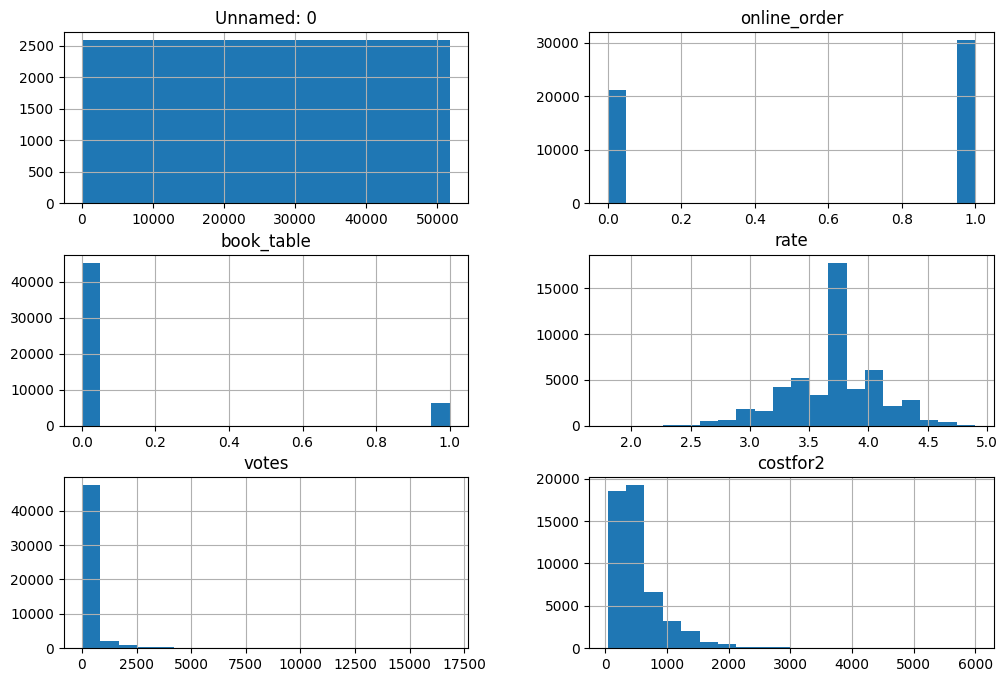

In [182]:
df.hist(figsize=(12,8),bins=20)
plt.show()